# Introduction

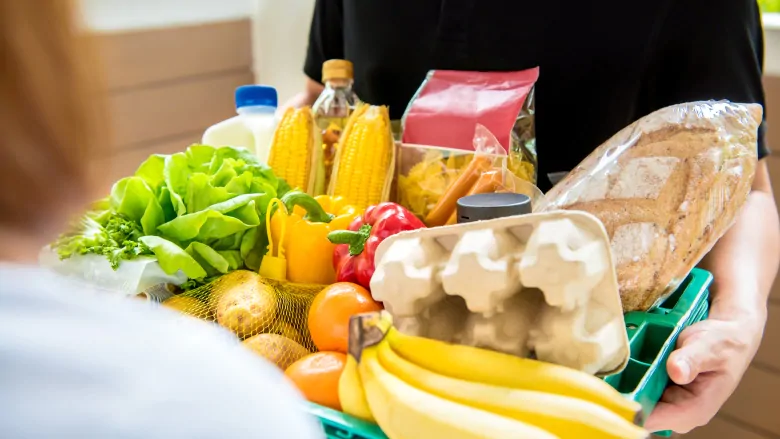

## Contents

- Information abaut Data
- Import Libs and Read Data
- EDA
- Apriori

# Information about Data

- Dataset Name : Groceries dataset
- Dataset Columns : 
- - Member_number
- - Date
- - itemDescription

# Import Libs and Read Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
import squarify

In [ ]:
data = pd.read_csv('../input/groceries-dataset/Groceries_dataset.csv')
data.head()

In [ ]:
data.Date = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day_of_week'] = data['Date'].dt.dayofweek

# EDA

In [ ]:
data.head()

# Best & Least Sellers

In [ ]:
data['itemDescription'].value_counts()

In [ ]:
x = list(data['itemDescription'].value_counts()[:10].values)
y = list(data['itemDescription'].value_counts()[:10].index)

plt.figure(figsize=(12,10))
ax=sns.barplot(x=x,y=y, palette=sns.cubehelix_palette(len(x)))
plt.title('Best Sellers')

In [ ]:
x = list(data['itemDescription'].value_counts()[-10:].values)
y = list(data['itemDescription'].value_counts()[-10:].index)

plt.figure(figsize=(12,10))
ax=sns.barplot(x=x,y=y, palette=sns.color_palette("winter_r"))
plt.title('Least Sellers')

# Best & Least Sellers by year

In [ ]:
data_year = data.groupby('year')

In [ ]:
data_year['itemDescription'].agg(['count'])

## 2014

In [ ]:
data_year2014 = data[data['year']==2014]
data_year2014['itemDescription'].value_counts()

In [ ]:
x = list(data_year2014['itemDescription'].value_counts()[:10].index)
y = list(data_year2014['itemDescription'].value_counts()[:10].values)

plt.figure(figsize=(8,10))
ax=sns.barplot(x=y,y=x, palette=sns.cubehelix_palette(len(x)))
plt.title('Best Sellers(2014)')

In [ ]:
x = list(data_year2014['itemDescription'].value_counts()[-10:].index)
y = list(data_year2014['itemDescription'].value_counts()[-10:].values)

plt.figure(figsize=(8,10))
ax=sns.barplot(x=y,y=x,palette=sns.color_palette("winter_r"))
plt.title('Best Sellers(2014)')

## 2015

In [ ]:
data_year2015 = data[data['year']==2015]
data_year2015['itemDescription'].value_counts()

In [ ]:
x = list(data_year2015['itemDescription'].value_counts()[:10].index)
y = list(data_year2015['itemDescription'].value_counts()[:10].values)

plt.figure(figsize=(8,10))
ax=sns.barplot(x=y,y=x, palette=sns.cubehelix_palette(len(x)))
plt.title('Best Sellers(2015)')

In [ ]:
x = list(data_year2015['itemDescription'].value_counts()[-10:].index)
y = list(data_year2015['itemDescription'].value_counts()[-10:].values)

plt.figure(figsize=(8,10))
ax=sns.barplot(x=y,y=x, palette=sns.color_palette("winter_r"))
plt.title('Best Sellers(2015)')

# General Information

In [ ]:
fig = px.sunburst(data, path=['year', 'month', 'day_of_week'],title="Dont Forget to Click Chart to Examine Deeply ")
fig.show()

# Item Descriptions

In [ ]:
targets = list(dict(data['itemDescription'].value_counts()).keys())
values = list(dict(data['itemDescription'].value_counts()).values())

fig = px.pie(
    values=values, 
    names=targets,
    title='Item Descriptions',
    color_discrete_sequence=['darkcyan', 'lawngreen']
)
fig.show()

In [ ]:
plt.figure(figsize = (50, 30))
squarify.plot(sizes = data.itemDescription.value_counts().values, alpha = 0.8,
              label = data.itemDescription.unique(), text_kwargs={'fontsize':18})
plt.title('Item Description', fontsize = 30)
plt.axis('off')
plt.show()

In [ ]:
plt.subplots(figsize=(50,30))
wordcloud = WordCloud(background_color = 'white',
                     width=512,
                     height=384).generate("".join(data['itemDescription']))

plt.imshow(wordcloud)
plt.axis('off')

# Apriori

https://github.com/ymoch/apyori

In [ ]:
pip install apyori

In [ ]:
from apyori import apriori

In [ ]:
apriori_data = pd.read_csv('../input/groceries-dataset/Groceries_dataset.csv')
apriori_data.head()

convert link : https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

In [ ]:
apriori_data = apriori_data.groupby(['Member_number','Date'])['itemDescription'].apply(','.join).reset_index()
apriori_data

In [ ]:
apriori_data.itemDescription.iloc[2]

In [ ]:
apriori_data.itemDescription.iloc[2].split(",")

In [ ]:
for i in range(len(apriori_data.itemDescription)):
    apriori_data.itemDescription[i] = apriori_data.itemDescription[i].split(",")

In [ ]:
item_list = list(apriori_data.itemDescription)
item_list

In [ ]:
rules = apriori(item_list, min_support = 0.0001, min_confidence= 0.0001)

In [ ]:
rules

In [ ]:
list_rules = list(rules)
print(len(list_rules))

In [ ]:
list_rules[0]

In [ ]:
results = []
for item in list_rules[:100]:
        pair = item[0]
        items = [x for x in pair]
        
        value_0 = str(items[0])
        value_1 = str(item[1])[:7]
        value_2 = str(item[2][0][2])[:7]
        value_3 = str(item[2][0][3])[:7]
        
        rows = (value_0, value_1, value_2, value_3)
        results.append(rows)
        
        col_names = ['Title_1','Support','Confidence','Lift']
        
        storage = pd.DataFrame.from_records(results,columns=col_names)
        
        print(storage)
        print(' ')